# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv('../data/train_set.csv', parse_dates=['timestamp'])

# EDA

In [3]:
df.head()

,_temporary_index_column,patient_id,timestamp,measurement_x,measurement_y,measurement_z,label
0,1,0,2015-12-29 14:50:34.095,0.811802,0.015569,0.068855,1
1,2,0,2015-12-29 14:50:34.145,0.808880,0.007757,0.073745,1
2,3,0,2015-12-29 14:50:34.195,0.806039,-0.000084,0.073402,1
3,4,0,2015-12-29 14:50:34.245,0.803278,-0.007953,0.075000,1
4,5,0,2015-12-29 14:50:34.295,0.800599,-0.015851,0.076689,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799999 entries, 0 to 799998
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   _temporary_index_column  799999 non-null  int64         
 1   patient_id               799999 non-null  int64         
 2   timestamp                799999 non-null  datetime64[ns]
 3   measurement_x            799999 non-null  float64       
 4   measurement_y            799999 non-null  float64       
 5   measurement_z            799999 non-null  float64       
 6   label                    799999 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 42.7 MB


In [5]:
df.describe()

,_temporary_index_column,patient_id,measurement_x,measurement_y,measurement_z,label
count,799999.000000,799999.000000,799999.000000,799999.000000,799999.000000,799999.000000
mean,400000.000000,12848.728287,0.652244,0.148045,0.073163,0.439943
std,230939.963337,7418.937484,0.241065,0.204066,0.059840,0.691995
min,1.000000,0.000000,-0.621091,-1.045211,-0.004350,0.000000
25%,200000.500000,6378.000000,0.478952,0.016042,0.033487,0.000000
50%,400000.000000,12830.000000,0.611564,0.128319,0.058148,0.000000
75%,599999.500000,19275.000000,0.797053,0.252838,0.094124,1.000000
max,799999.000000,25705.000000,1.905430,1.506080,0.478850,2.000000


### Records per Patient

In [6]:
df.groupby('patient_id').count().sort_values(by='measurement_x')

,_temporary_index_column,timestamp,measurement_x,measurement_y,measurement_z,label
patient_id,,,,,,
22447,1,1,1,1,1,1
21161,1,1,1,1,1,1
15318,1,1,1,1,1,1
15317,1,1,1,1,1,1
15316,1,1,1,1,1,1
...,...,...,...,...,...,...
18961,101,101,101,101,101,101
10817,101,101,101,101,101,101
10818,101,101,101,101,101,101


There are patients with very few records

# Duplicates

In [7]:
df[df.duplicated(subset=['measurement_x', 'measurement_y', 'measurement_z', 'label'])]

,_temporary_index_column,patient_id,timestamp,measurement_x,measurement_y,measurement_z,label
31,32,1,2015-12-29 14:50:35.896440,0.811802,0.015569,0.068855,1
32,33,1,2015-12-29 14:50:35.946440,0.808880,0.007757,0.073745,1
33,34,1,2015-12-29 14:50:35.996440,0.806039,-0.000084,0.073402,1
34,35,1,2015-12-29 14:50:36.046440,0.803278,-0.007953,0.075000,1
35,36,1,2015-12-29 14:50:36.096440,0.800599,-0.015851,0.076689,1
...,...,...,...,...,...,...,...
799980,799981,25704,2014-06-25 20:17:52.166980,0.750092,0.482636,0.017884,0
799981,799982,25704,2014-06-25 20:17:52.216980,0.750124,0.486915,0.014220,0
799982,799983,25704,2014-06-25 20:17:52.266980,0.750114,0.491194,0.010904,0
799983,799984,25704,2014-06-25 20:17:52.316980,0.750060,0.495473,0.006120,0


### Time Interval Distribution

In [8]:
df['time_interval'] = df.groupby('patient_id')['timestamp'].diff(1)
df['time_interval'] = df['time_interval'].fillna(pd.Timedelta(0))
df['time_interval'] = df['time_interval'].dt.total_seconds()

<AxesSubplot:ylabel='Frequency'>

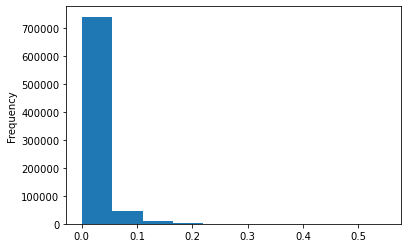

In [9]:
df['time_interval'].plot.hist()

Time interval for most of the measurements is every 0.05 for most

### Accumulated Time Distribution

In [10]:
df['accum_time'] = df.groupby('patient_id')['time_interval'].cumsum()

<AxesSubplot:ylabel='Frequency'>

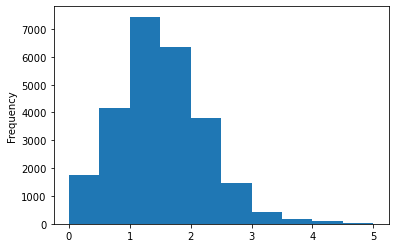

In [11]:
df.groupby('patient_id')['accum_time'].last().plot.hist()

Most of the patients measurements are between 1 and 2 minutes

### Measurements plots

<AxesSubplot:>

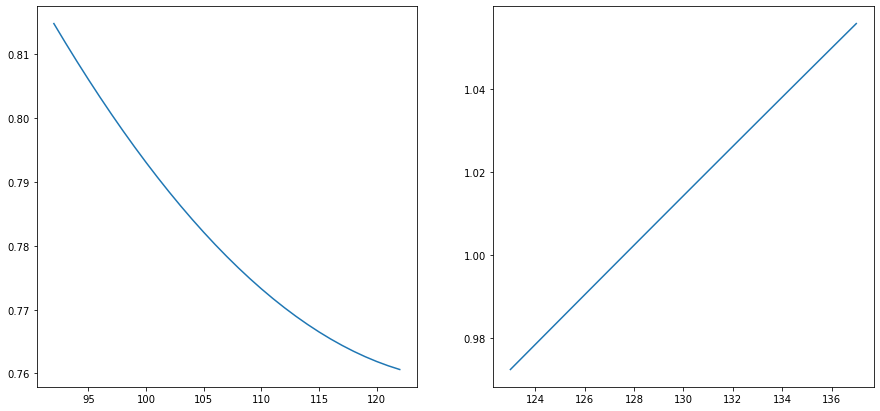

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
df[df.patient_id == 3]['measurement_x'].plot(ax=ax1)
df[df.patient_id == 4]['measurement_x'].plot(ax=ax2)

The shape of the measure X can be modeled as quadratic or linear

<AxesSubplot:>

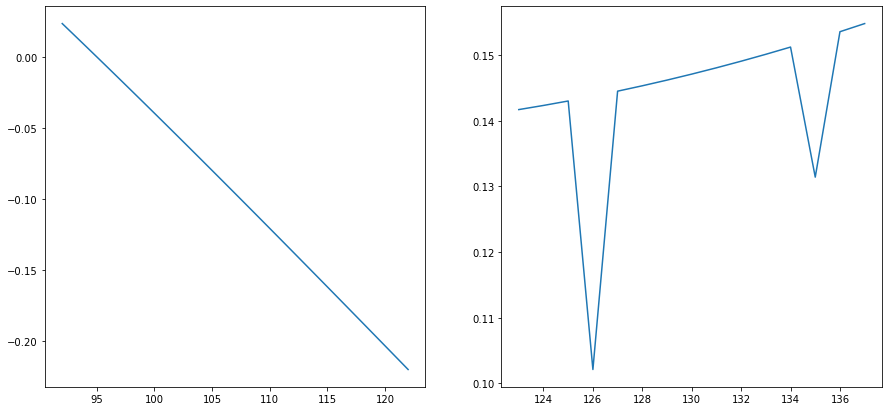

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
df[df.patient_id == 3]['measurement_y'].plot(ax=ax1)
df[df.patient_id == 4]['measurement_y'].plot(ax=ax2)

The shape of the measurement y over can be modeled as linear

<AxesSubplot:>

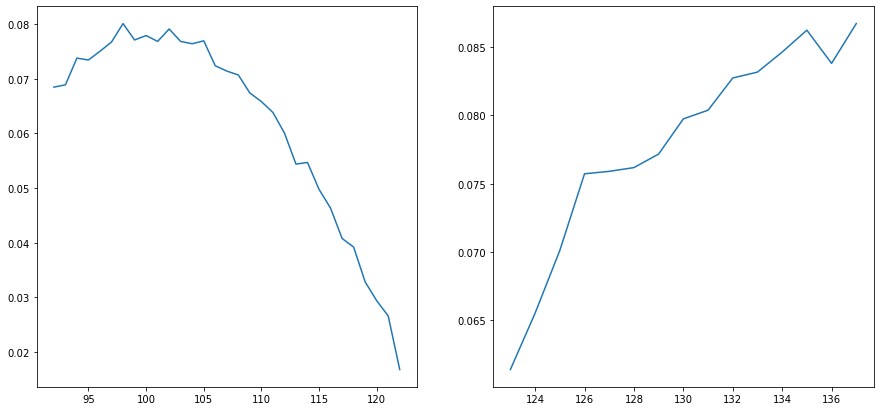

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
df[df.patient_id == 3]['measurement_z'].plot(ax=ax1)
df[df.patient_id == 4]['measurement_z'].plot(ax=ax2)

The shape of the measurement Z can be modeled as quadratic or linear

### Distribution of classes

In [15]:
assert all(df.groupby('patient_id').mean()['label'].unique() == [1, 0, 2])
print('For each patient there is only one label')

For each patient there is only one label


<AxesSubplot:ylabel='label'>

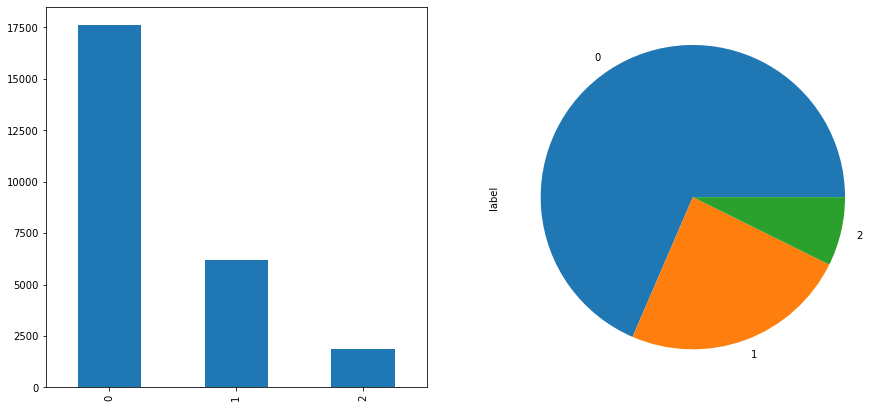

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
labels = df.groupby('patient_id')['label'].first()
labels.value_counts().plot.bar(ax=ax1)
labels.value_counts().plot.pie(ax=ax2)

Classes are not balanced